## BIODATA DIRI
NAMA     :  NUR MUHAMMAD ERJI RIDHO LUBIS 

EMAIL    :  erjialmadani@gmail.com

USERNAME :  erjiridholubis

In [1]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import tensorflow as tf
import zipfile,os

# from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# extract datasheets
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/rockpaperscissors/')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [4]:
base_dir = '/tmp/rockpaperscissors'

#buat direktori train & validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
# print(train_dir)

In [5]:
#membuat membuat dan validasi direktori train dan validationmembuat membuat dan validasi direktori train dan validation
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [6]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')
# print(rock_dir)

#memecah directory menjadi train dan validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4 )
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4 )
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
# print(os.listdir(scissors_dir))

In [7]:
# inisialisasi direktori train dan val dalam direktori rockpaperscissors
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# print(train_rock)

In [8]:
# membuat membuat dan validasi direktori train dan validation pada direktori rockpaperscissors
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
if not os.path.exists(train_paper):
    os.mkdir(train_paper)
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)

if not os.path.exists(val_rock):
    os.mkdir(val_rock)
if not os.path.exists(val_paper):
    os.mkdir(val_paper)
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [9]:
#copy data train ke directory baru
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

#copy data validation ke directory baru
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [10]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [11]:
# image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    shuffle=True,
    batch_size=32,
    #subset='training',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100,150),
    # shuffle=False,
    batch_size=32,
    #subset='validation',
    class_mode='categorical',
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
# make CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# latih model dengan model.fi
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
)

Epoch 1/20
25/25 - 12s - loss: 1.0782 - accuracy: 0.4038 - val_loss: 0.9863 - val_accuracy: 0.3562
Epoch 2/20
25/25 - 9s - loss: 0.6889 - accuracy: 0.7425 - val_loss: 0.3853 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 8s - loss: 0.3751 - accuracy: 0.8838 - val_loss: 0.3400 - val_accuracy: 0.8813
Epoch 4/20
25/25 - 8s - loss: 0.3257 - accuracy: 0.8863 - val_loss: 0.2040 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 8s - loss: 0.2501 - accuracy: 0.9187 - val_loss: 0.1863 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 8s - loss: 0.1893 - accuracy: 0.9488 - val_loss: 0.1401 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 8s - loss: 0.1762 - accuracy: 0.9525 - val_loss: 0.1065 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 8s - loss: 0.1724 - accuracy: 0.9362 - val_loss: 0.0608 - val_accuracy: 0.9812
Epoch 9/20
25/25 - 7s - loss: 0.1655 - accuracy: 0.9425 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 10/20
25/25 - 7s - loss: 0.1638 - accuracy: 0.9525 - val_loss: 0.1397 - val_accuracy: 0.9625
Epoch 11/20
25/25 

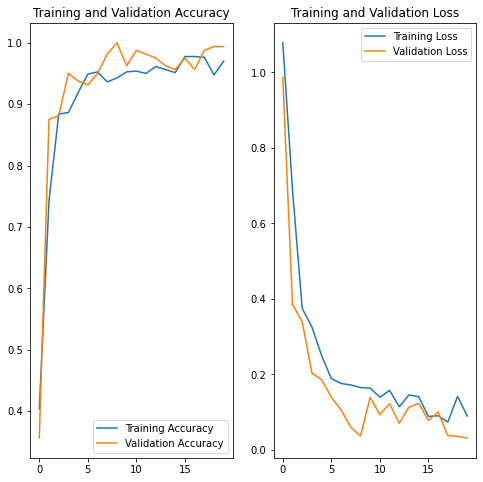

In [17]:
# tampilkan hasil akurasi kedalam plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

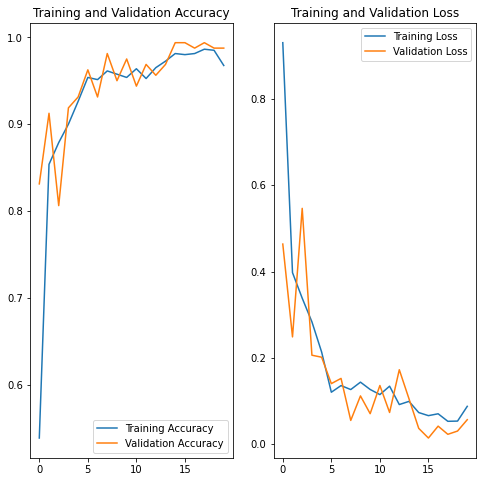

In [65]:
# tampilkan hasil akurasi kedalam plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving kertas.jpeg to kertas.jpeg
kertas.jpeg
paper


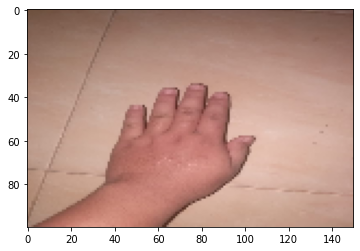

In [66]:
# testing akurasi data
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')

In [1]:
logos = ["daewoo","cbs","fox-news","mk","lebron-james","bitmoji","ios","windows-vista","kraft","ricola","tommy-hilfiger","megadeth","bosch","dope","kangol","electrolux","mit","quiksilver","fortnite","sasa","givenchy","lexmark","british-airways","jeep","metro-exodus","dunkin-donuts","seagate","best-buy","del-monte","android","baidu","directv","boston-red-sox","detroit-tigers","patagonia","undefeated","kenmore","jaguar","new-england-patriots","merck","best-friends-animal-society","calvin-klein","banfield-pet-hospital","envirofit","sinopharm","chloe","toronto-zoo","timberland","bank-of-america","the-walt-disney-company","vizio","ormat","westinghouse","bally","opel","qualcomm","applebees","tchibo","prada","bbc","erm","weibo","toyota","valentino","hsbc","diadora","repsol","iqiyi","microsoft","ihop","tumblr","bbb","cisco","coach","yelp","umbro","cheetos","balenciaga","nfl","volcom","dish-network","nestlé","tiktok","flickr","gm","gap","harp-beer","simplot","kitchenaid","blogger","deloitte","whatsapp","hershey","mclaren","sas","chase","keller-williams","fisker","organic-valley","alaska-airlines","abb","marvel","farm-sanctuary","hummer","hulu","tesla","cardinal-health","fila","citibank","honda","uber","google-play","tripadvisor","hollister","shopify","twitch","spotify","huf","whirlpool","kia","baskin-robbins","under-armour","florida-state-university","maserati","porsche","linux","groupon","github","viacom","barnes-and-noble","illinois-state-university","scion","las-vegas","orange","itunes","bentley","sears","k-swiss","datsun","hp","caesars","unilever","bayer","robocraft","schlumberger","toshiba","spacex","goyard","wayfair","xerox","goldman-sachs","lufthansa","outlook","fitbit","meijer","nokia","freshfields-bruckhaus-deringer","tyson-foods","uaw","ea","expedia","rossion","neff","maggi","mlb","ugg","guinness","walgreens","disneyland","chevron","epson","toys-r-us","newegg","finnair","honeywell","acer","nickelodeon","bts","cognizant","sports-authority","champion","tostitos","kpmg","sap","kfc","canon","petsmart","vineyard-vines","chick-fil-a","fedex-office","versace","petland","ruf","hbo","redr","sprite","verisign","hotmail","kaspersky","louis-vuitton","chanel","target","dodge","eagles","panera","general-motors","yeezy","häagen-dazs","fandango","metallica","bmw-m","pg_e","facebook","firefox","qatar-airways","green-giant","gnc","ktm","abbott","genesis","hermes","nordstrom","united-nations","new-balance","nescafé","magnum","mini","hino","etsy","zelle","oscar-mayer","paypal","wells-fargo","netscape","maybach","pet-food-express","philips-healthcare","time-warner","beats","linkedin","novartis","google-maps-app","philadelphia-76ers","netflix","saturn","mitsubishi","disturbed","cartier","coldplay","amazon","safeway","bose","minecraft","zara","micron","telstra","espn","amana","cargill","solarcity","reebok","acura","brother","harvard","linklaters","babies-r-us","indeed","panasonic","taco-bell","adidas","playstation","rolls-royce","uncrate","tvr","grab","peloton","tiffany","kodak","delorean","didi","guess","ebay","pink-floyd","chiquita","pontiac","redfin","hawaiian-airlines","ram","quizlet","nbc","oldsmobile","sprint","twitter","abarth","queen","grand-canyon-u","whole-foods","pringles","lipsense","balmain","publix","usps","kaiser-permanente","alibaba","rheem","oreo","aerosmith","aldi","twizzlers","petco","microsoft-word","airbnb","vons","ibm","gq","nike","discover","verizon","peugeot","dell","frozen","latham-watkins","pixar","realtor","frigidaire","lacoste","kawasaki","accenture","saab","shell","pfizer","united-states-environmental-protection-agency","kmart","kenzo","chrome","nba","exelon","fiskars","mirinda","skechers","aliexpress","chicago-bears","waymo","kelloggs","dupont","yamaha","rvca","kr3w","ricoh","openai","chewy","fedex","soundcloud","camaro","pantera","htc","salesforce","merrimack-pharmaceuticals","rolex","thermador","holden","real-madrid","samsung","chevrolet","mls","tangled","ups","boeing","dasani","slack","wattpad","iveco","bertolli","jcpenney","windows-7","nissan","knorr","fanta","new-york-mets","horizon-organic","home-depot","sharp","exxon-mobil","vimeo","mazda","natural-resources-defense-council","infiniti","comfort-suites","wendys","bmw","american-airlines","carlsberg","hitachi","rwe-ag","new-york-yankees","chrysler","alipay","vans","lincoln","thrasher","benq","mgm-grand","disney""mastercard","kiss","xzeres-wind","showtime","rosneft-oil","universal","polo","visa","blockbuster","krispy-kreme","uniqlo","neuralink","quora","sinopec","reliance-industries","disney-channel","hoffmann-la-roche","lego","goodman","unicef","lamborghini","jenn-air","san-francisco-giants","ikea","los-angeles-dodgers","volvo","nvidia","hm","in-n-out-burger","kobelco","hyperbeast","rover","lukoil","petrochina","philips","mobileiron","new-york-giants","aecom","batman","dreamworks","kansas-city-chiefs","xeon","disney-world","intel","ferrari","skype","sanofi","openstack","volkswagen","opentable",".ipynb_checkpoints","venmo","nesquik","baker-mckenzie","lays","xbox","gatorade","manchester-united","teennick","qzone","ttx","hope-for-paws","dgk","yale","maroon-5","the-washington-post","p_g","air-jordan","oppo","kroger","sothebys-international-realty","lenovo","haier","ovaltine","ffc","messenger","blizzard","youtube","heinz","redbox","rolling-stones","opera","apple","bp","mickey-mouse","american-express","dior","kirkland-ellis","vine","rei","capital-one","maytag","dyson","victoria-secret-pink","houston-rockets","free-fire","geico","chipotle","google-business","skoda","experian","skadden","air-france","era-real-estate","m_m_s","nutella","app-store","endesa","deutsche-bank","taobao","chicago-cubs","houzz","google","blockchain","la-quinta","wifi","cnn","spyker","bratz","fresenius","wish","clifford-chance","kith","comfort-inn","wwf","los-angeles-lakers","instagram","baxter","sony","dhl","air-new-zealand","pagani","iberia","skittles","lexus","quickbooks","paccar","nirvana","deathwish","amd","maruchan","zenvo","comcast","dc","tinder","ripndip","paramount","aol","general-electric","pinterest","gucci","nestle-purina","highsnobiety","internet-explorer","mercedes-benz","element","hampton-inn","ubuntu","citroen","dole-food-company","kyocera","singapore-airlines","nasa","godsmack","windows-xp","west-virginia-university","pepsi","zynga","zumiez","mercury","milka","united-technologies","lrg","adobe","gmc","puma","doritos","trulia","coldwell-banker","everlast","lyft","domini","resident-evil","macys","bing","oracle","kit-kat","fiat","allergan","wordpress","undercover","walmart","healthgrades","foursquare","aig","ucare","duckduckgo","renault","coca-cola","hyundai","toblerone","century-21","guns-n-roses","tencent","san-diego-zoo","ps4","boston-celtics","lowes","medtronic","bathing-ape","lg","old-navy","cadillac","roblox","safari","zillow","gmail","bitcoin","huawei","isuzu","ford","equal-housing-opportunity","viber","mcdonalds",
]

In [18]:
# for i in logos:
#     print(i)